# Visualisation [Marias](Maria.md) data
ID: tnK534JMwwfhvUEycn69HPbhqkt2
Marias data is presented below after one week of use, one month of use and one year of use. The data reflects her persona and travel patterns.

Index([u'detectedActivity', u'geoHash', u'minuteOfDay', u'weekday',
       u'journey'],
      dtype='object')
(6759, 5)


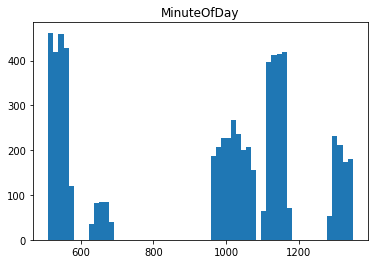

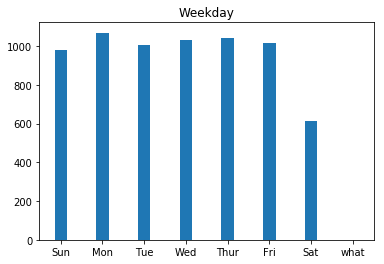

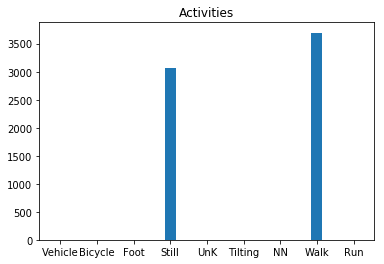

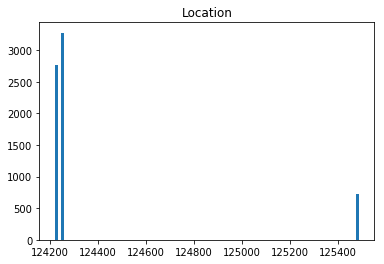

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
##Uncomment here
#Week
#trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(159,6762)))
#Month
#trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(500,6762)))
#Year
trainingData = np.array(pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-"))
training = pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-")
range(1001)
labelData = trainingData[:,4]
labelData = np.transpose(labelData)
trainingTuples = trainingData[:,:4]
#Minute
plt.title("MinuteOfDay")
plt.hist(trainingData[:,2],60)
plt.show()
#Weekday
names=["Sun","Mon","Tue","Wed","Thur","Fri","Sat","what"]
plt.title("Weekday")
x=plt.bar(names,np.bincount(trainingData[:,3],minlength=8),0.3,)
plt.show()
#Activities
names=["Vehicle","Bicycle","Foot","Still","UnK","Tilting","NN","Walk","Run"]
plt.title("Activities")
x=plt.bar(names,np.bincount(trainingData[:,0],minlength=9),0.3,)
plt.show()
#Location
plt.title("Location")
result2=np.true_divide(trainingData[:,1],10000)
plt.hist(result2,100)
plt.show()

In [42]:
import shutil
import sys, getopt
import tensorflow as tf
import time
import numpy as np
import pandas as pd
import os

print("Tensorflow version: "+tf.VERSION+ " Python version: "+sys.version)
TABLE = 'tnK534JMwwfhvUEycn69HPbhqkt2'
ROOT_DIR = "pendlaren"
export_dir = os.path.join(ROOT_DIR, TABLE)
print(os.path.abspath(export_dir))
tf.logging.set_verbosity(tf.logging.WARN)

def load_data(to_row,y_name='journey'):
    train = pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(to_row,6762))
    train_x, train_y = train, train.pop(y_name)
    #I know WRONG
    test =pd.read_csv("data/tnK534JMwwfhvUEycn69HPbhqkt2.csv",comment="-",skiprows=range(1,6000))
    test_x, test_y = test, test.pop(y_name)
    train_y.astype(str)
    return (train_x, train_y.astype(str)), (test_x, test_y.astype(str))

def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset


#print(my_feature_columns)
#Below LinearClassifier (Logistic regression) https://www.tensorflow.org/get_started/feature_columns
detectedActivity = tf.feature_column.categorical_column_with_identity(key="detectedActivity",num_buckets=7,default_value=0)
geoHash = tf.feature_column.categorical_column_with_hash_bucket("geoHash",100,dtype=tf.int64)
minuteOfDay = tf.feature_column.numeric_column("minuteOfDay")
weekDay = tf.feature_column.categorical_column_with_identity(key="weekday",num_buckets=7,default_value=0)
feature_columns = [detectedActivity,geoHash,minuteOfDay,weekDay]

Tensorflow version: 1.8.0 Python version: 2.7.12 (default, Dec  4 2017, 14:50:18) 
[GCC 5.4.0 20160609]
/home/lars_rauer/notebookcommute/notebooks/commuter/pendlaren/tnK534JMwwfhvUEycn69HPbhqkt2


### After use

In [45]:
retrainAll = True
if retrainAll:
    try:
        shutil.rmtree(export_dir)
        print("Deleting all")
    except:
        print("No dir to remove")
        
#(train_x, train_y), (test_x, test_y)= load_data(to_row=159)
#(train_x, train_y), (test_x, test_y)= load_data(to_row=500)
(train_x, train_y), (test_x, test_y)= load_data(to_row=6762)
label_vocabulary = np.unique(train_y).tolist()
classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns,
                                            n_classes=len(label_vocabulary),
                                            model_dir=export_dir,
                                            label_vocabulary=label_vocabulary)

classifier.train(input_fn=lambda:train_input_fn(train_x, train_y, 100), max_steps=1000)

expected = ['8121680000', '8121690042', '8014081216']
predict_x = {
    'detectedActivity': [7,3,7],
    'geoHash': [1242479403, 1242479403, 1242212679],
    'minuteOfDay': [531,560,1347],
    'weekday': [2,6,5],
}

predictions = classifier.predict(
    input_fn=lambda:eval_input_fn(predict_x,labels=None, batch_size=100))

template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print(template.format(label_vocabulary[class_id],100 * probability, expec))

Deleting all

Prediction is "8121680000" (81.1%), expected "8121680000"

Prediction is "8121690042" (97.2%), expected "8121690042"

Prediction is "8014081216" (99.8%), expected "8014081216"


In [ ]:
##Extras
# # Evaluate the model.
# def eval_input_fn(features, labels, batch_size):
#     """An input function for evaluation or prediction"""
#     features=dict(features)
#     if labels is None:
#         # No labels, use only features.
#         inputs = features
#     else:
#         inputs = (features, labels)
#     dataset = tf.data.Dataset.from_tensor_slices(inputs)
#     assert batch_size is not None, "batch_size must not be None"
#     dataset = dataset.batch(batch_size)
#     return dataset
# eval_result = classifier.evaluate(
#     input_fn=lambda:eval_input_fn(test_x, test_y, batch_size=100))
# #print(eval_result)
# print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))